<h1>ATAR: Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span><ul class="toc-item"><li><span><a href="#API-from-spkit" data-toc-modified-id="API-from-spkit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>API from spkit</a></span></li></ul></li><li><span><a href="#Import-EEG-sample-data" data-toc-modified-id="Import-EEG-sample-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import EEG sample data</a></span><ul class="toc-item"><li><span><a href="#Filter-with-highpass" data-toc-modified-id="Filter-with-highpass-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Filter with highpass</a></span></li></ul></li><li><span><a href="#Applying-ATAR-Algorithm" data-toc-modified-id="Applying-ATAR-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Applying ATAR Algorithm</a></span><ul class="toc-item"><li><span><a href="#Soft-Thresholding:-default-settings:-OptMode='soft'-and-$\beta=0.1$" data-toc-modified-id="Soft-Thresholding:-default-settings:-OptMode='soft'-and-$\beta=0.1$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Soft Thresholding: default settings: OptMode='soft' and $\beta=0.1$</a></span></li><li><span><a href="#Linear-Attenuation" data-toc-modified-id="Linear-Attenuation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Attenuation</a></span></li><li><span><a href="#Elimination" data-toc-modified-id="Elimination-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Elimination</a></span></li><li><span><a href="#Tuning-$\beta$-with-'soft'-:-Controlling-the-aggressiveness" data-toc-modified-id="Tuning-$\beta$-with-'soft'-:-Controlling-the-aggressiveness-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tuning $\beta$ with 'soft' : Controlling the aggressiveness</a></span></li><li><span><a href="#Tuning-$\beta$-with-'elim'" data-toc-modified-id="Tuning-$\beta$-with-'elim'-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tuning $\beta$ with 'elim'</a></span></li></ul></li><li><span><a href="#Other-settings" data-toc-modified-id="Other-settings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other settings</a></span><ul class="toc-item"><li><span><a href="#Changing-wavelet-function" data-toc-modified-id="Changing-wavelet-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Changing wavelet function</a></span></li><li><span><a href="#Changing-upper-and-lower-bounds:-$k_1$,-$k_2$" data-toc-modified-id="Changing-upper-and-lower-bounds:-$k_1$,-$k_2$-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Changing upper and lower bounds: $k_1$, $k_2$</a></span></li><li><span><a href="#Changing-IPR----Interpercentile-range" data-toc-modified-id="Changing-IPR----Interpercentile-range-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Changing IPR -  Interpercentile range</a></span></li><li><span><a href="#Using-the-fix-threshold-$\theta_\alpha=300$,--to-all-the-windows" data-toc-modified-id="Using-the-fix-threshold-$\theta_\alpha=300$,--to-all-the-windows-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Using the fix threshold $\theta_\alpha=300$,  to all the windows</a></span></li><li><span><a href="#Changing-window-length-(5-sec)" data-toc-modified-id="Changing-window-length-(5-sec)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Changing window length (5 sec)</a></span></li></ul></li><li><span><a href="#Doc" data-toc-modified-id="Doc-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Doc</a></span></li></ul></div>

**ATAR Algorithm -  Automatic and Tunable Artifact Removal Algorithm for EEG Signal.** 

The algorithm is based on wavelet packet decomposion (WPD), the full description of algorithm can be found here [Automatic and Tunable Artifact Removal Algorithm for EEG from artical]


The algorithm is applied on the given multichannel signal X (n,nch), window wise and reconstructed with overall add method. The defualt window size is set to 1 sec (128 samples). For each window, the threshold $\theta_\alpha$ is computed and applied to filter the wavelet coefficients.

There is manily one parameter that can be tuned $\beta$ with different operating modes and other settings.
Here is the list of parameters and there simplified meaning given:
Parameters:
* $\beta$: This is a main parameter to tune, highher the value, more aggressive the algorithm to remove the artifacts. By default it is set to 0.1. $\beta$ is postive float value.

* ***OptMode***: This sets the mode of operation, which decides hoe to remove the artifact. By default it is set to 'soft', which means Soft Thresholding, in this mode, rather than removing the pressumed artifact, it is suppressed to the threshold, softly. OptMode='linAtten', suppresses the pressumed artifact depending on how far it is from threshold. Finally, the most common mode - Elimination (OptMode='elim'), which remove the pressumed artifact.

    * Soft Thresholding and Linear Attenuation require addition parameters to set the associated thresholds which are by default set to bf=2, gf=0.8. 

* ***wv=db3***: Wavelet funtion, by default set to db3, could be any of ['db3'.....'db38', 'sym2.....sym20', 'coif1.....coif17', 'bior1.1....bior6.8', 'rbio1.1...rbio6.8', 'dmey']

* $k_1$, $k_2$: Lower and upper bounds on threshold $\theta_\alpha$.
* ***IPR=[25,75]***: interpercentile range, range used to compute threshold

# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import signal
#from joblib import Parallel, delayed

import spkit as sp
sp.__version__

'0.0.9.3'

## API from spkit

There are three functions in **spkit.eeg** for **ATAR algorithm**

* spkit.eeg.ATAR_1Ch(...)
* spkit.eeg.ATAR_mCh(...)
* spkit.eeg.ATAR_mCh_noParallel(...)

***sp.eeg.ATAR_1Ch*** is for single channel input signal x of shape (n,), where as, ***sp.eeg.ATAR_mCh*** is for multichannel signal X with shape (n,ch), which uses joblib for parallel processing of multi-channels. For some OS, this raise an error of ***BrokenProcessPool***, in that case use  ***sp.eeg.ATAR_mCh_noParallel***, which is same as ***sp.eeg.ATAR_mCh***, except parallel processing.

# Import EEG sample data

In [3]:
from spkit.data import load_data

In [20]:
X,ch_names = load_data.eegSample()
fs = 128

In [18]:
#help(sp.filter_X)

## Filter with highpass

In [22]:
Xf = sp.filter_X(X,band=[0.5], btype='highpass',fs=fs,verbose=0).T
Xf.shape

(2048, 14)

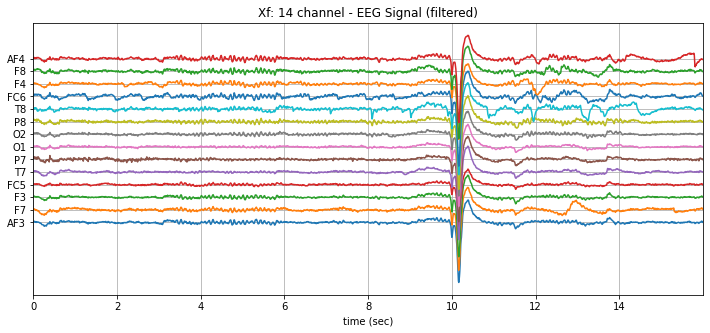

In [35]:
t = np.arange(Xf.shape[0])/fs
plt.figure(figsize=(12,5))
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()

# Applying ATAR Algorithm 

## Soft Thresholding: default settings: OptMode='soft' and $\beta=0.1$

In [31]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),verbose=0)
XR.shape

(2048, 14)

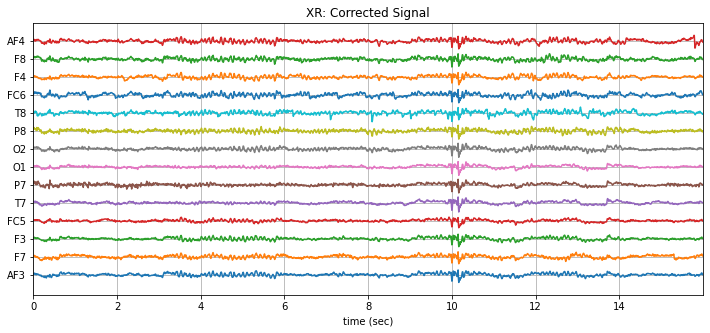

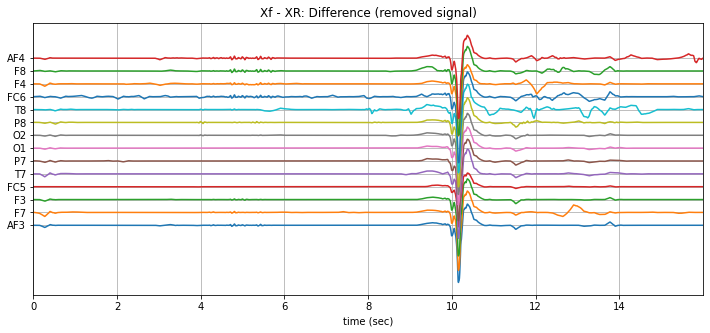

In [39]:
plt.figure(figsize=(12,5))
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Linear Attenuation

In [40]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),verbose=0,OptMode='linAtten')
XR.shape

(2048, 14)

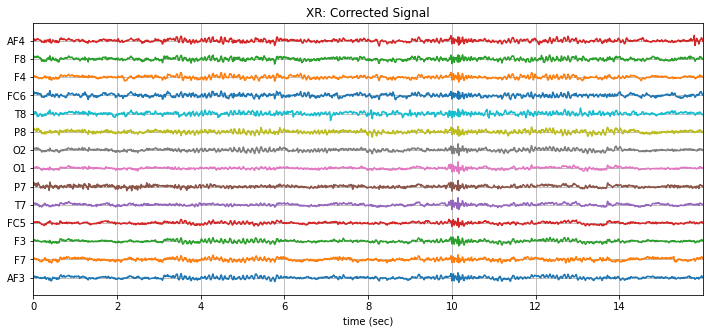

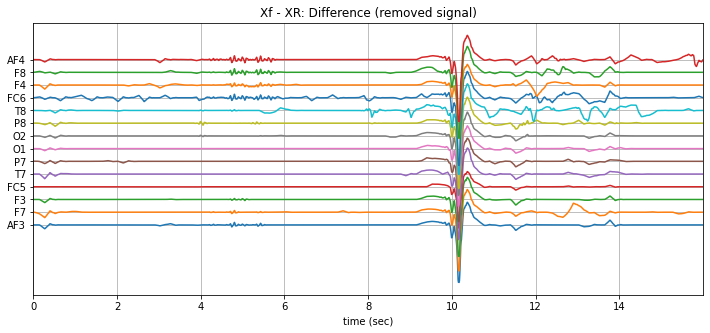

In [41]:
plt.figure(figsize=(12,5))
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Elimination

In [42]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),verbose=0,OptMode='elim')
XR.shape

(2048, 14)

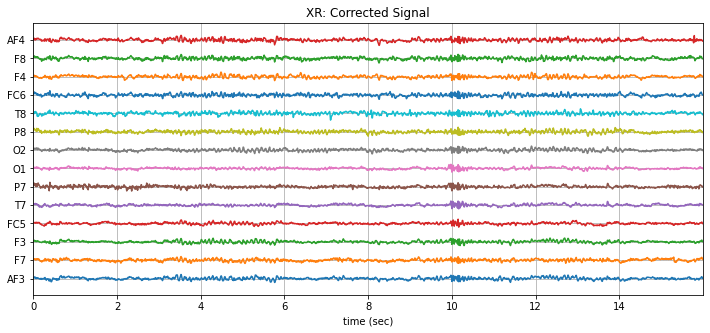

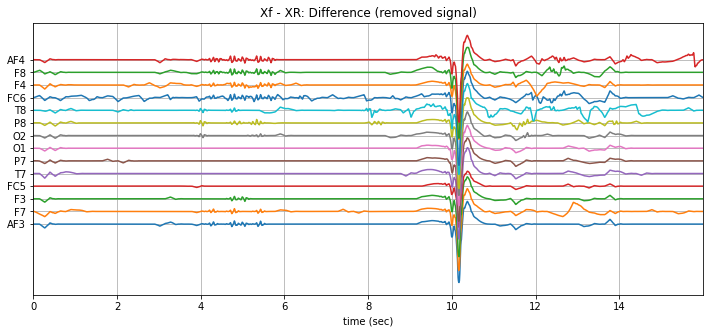

In [43]:
plt.figure(figsize=(12,5))
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Tuning $\beta$ with 'soft' : Controlling the aggressiveness

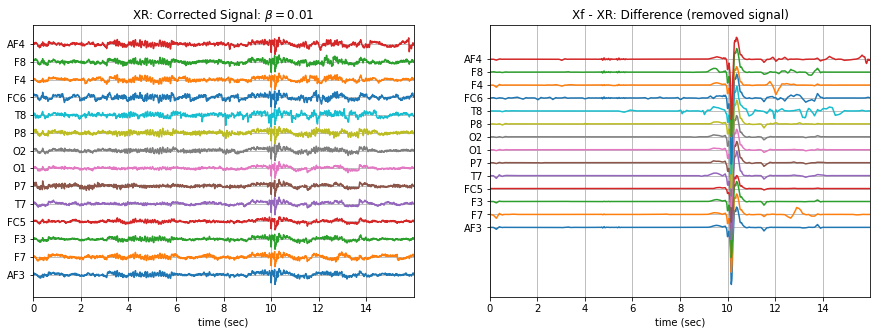

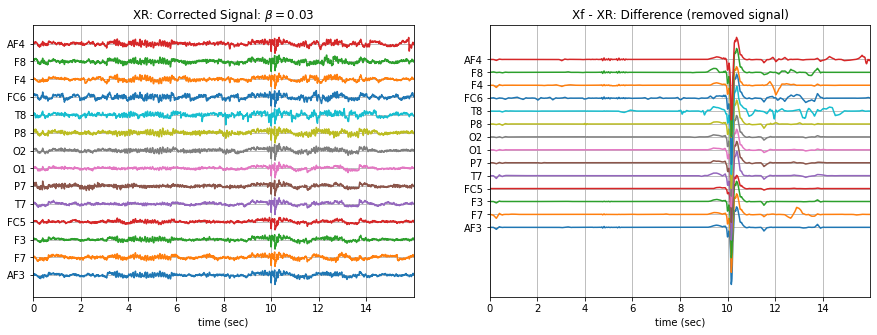

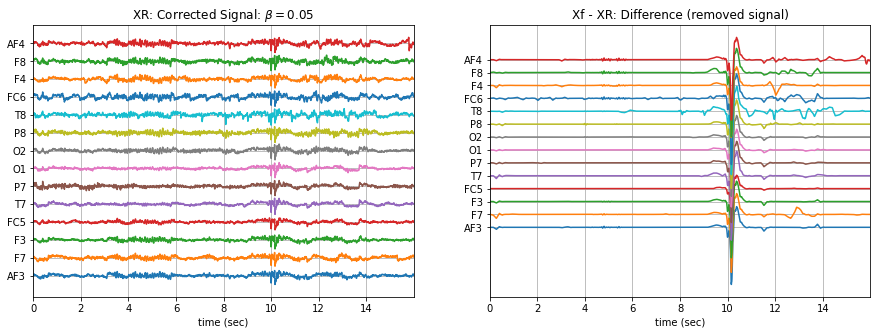

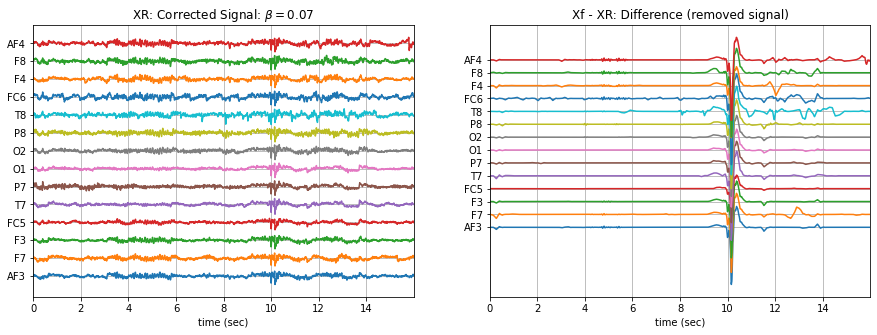

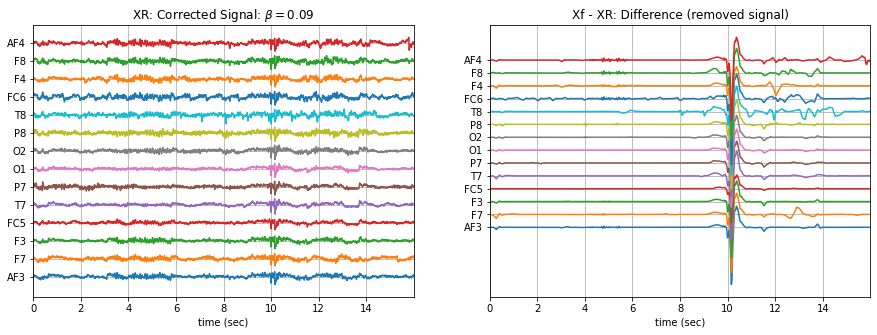

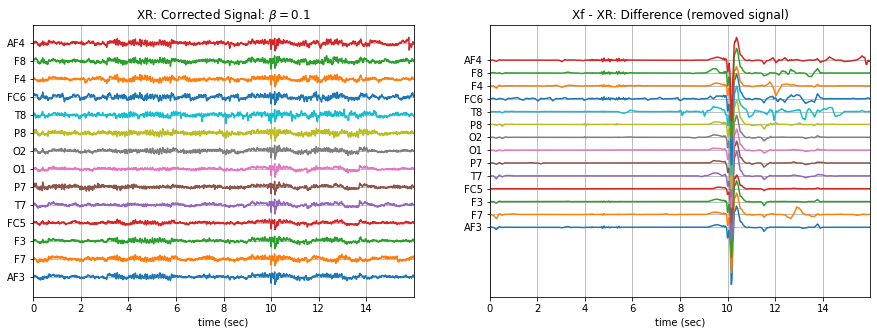

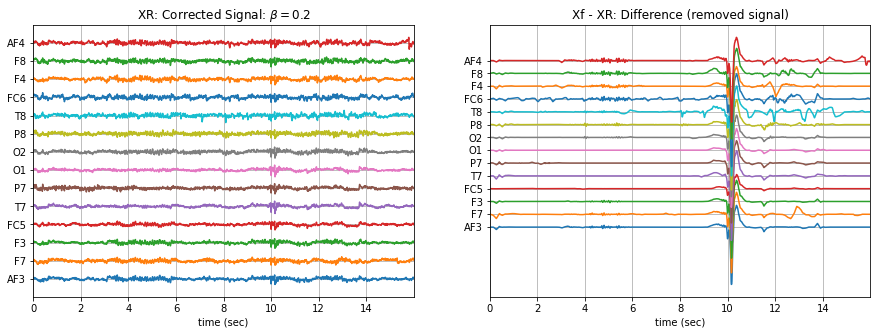

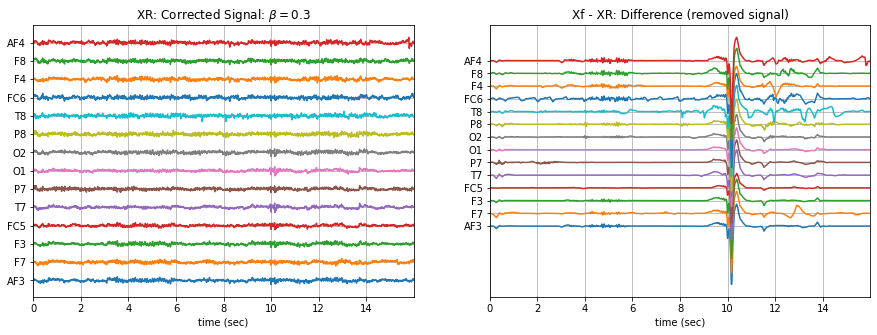

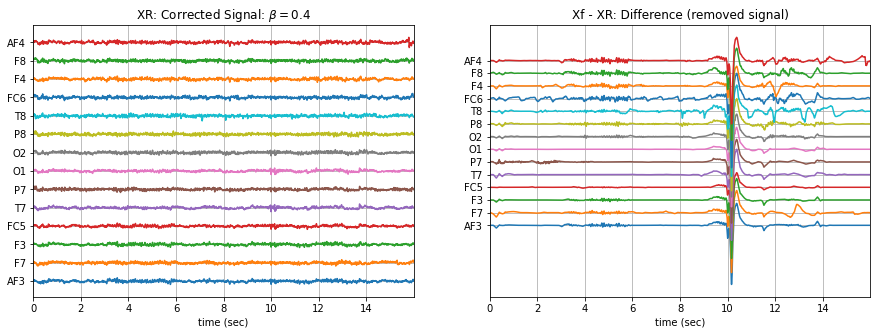

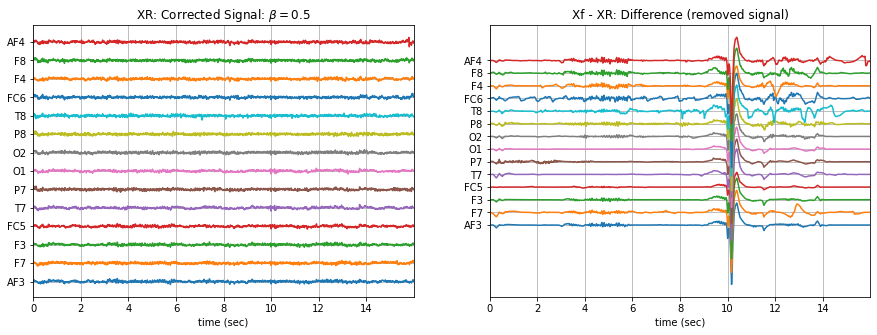

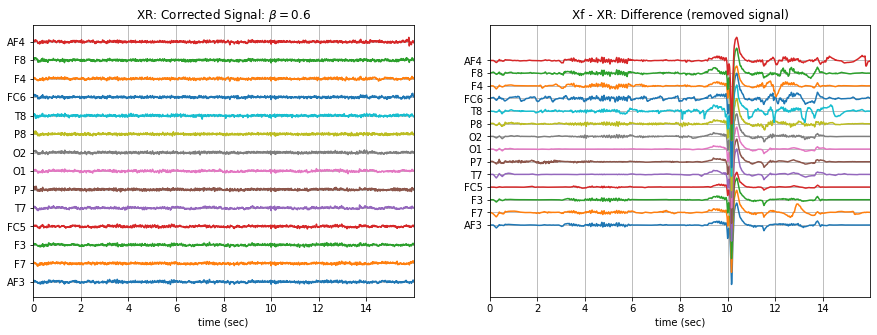

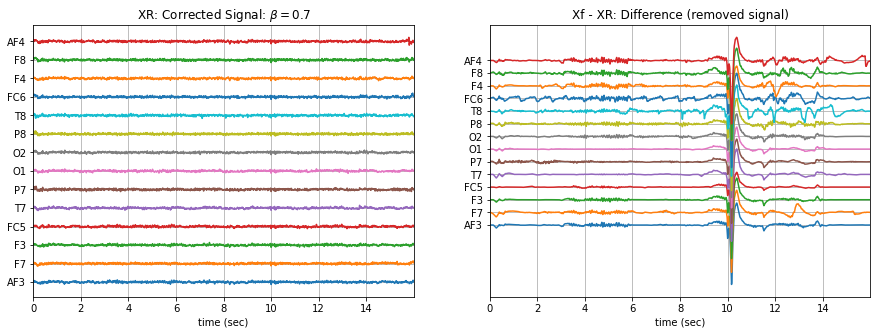

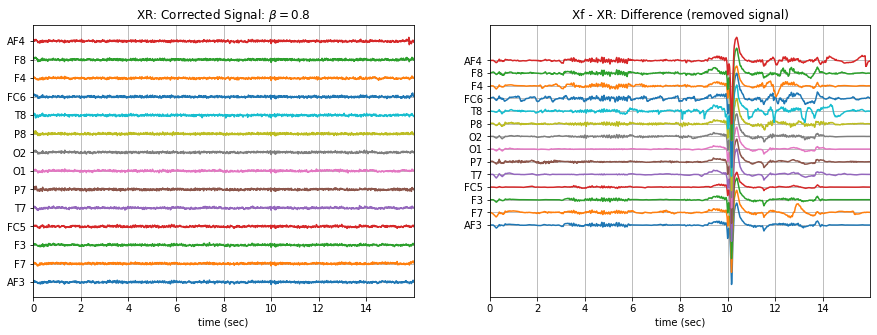

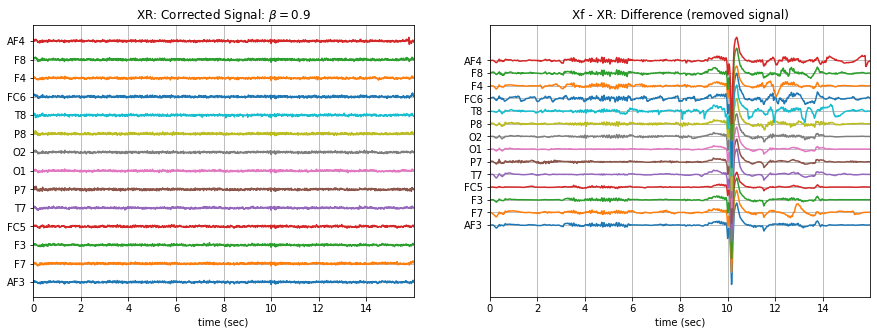

In [66]:
betas = np.r_[np.arange(0.01,0.1,0.02), np.arange(0.1,1, 0.1)].round(2)

for b in betas:
    XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),verbose=0,beta=b,OptMode='soft')
    XR.shape

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,XR+np.arange(-7,7)*200)
    plt.xlim([t[0],t[-1]])
    plt.xlabel('time (sec)')
    plt.yticks(np.arange(-7,7)*200,ch_names)
    plt.grid()
    plt.title('XR: Corrected Signal: '+r'$\beta=$' + f'{b}')
    
    plt.subplot(122)
    plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
    plt.xlim([t[0],t[-1]])
    plt.xlabel('time (sec)')
    plt.yticks(np.arange(-7,7)*200,ch_names)
    plt.grid()
    plt.title('Xf - XR: Difference (removed signal)')
    plt.show()

## Tuning $\beta$ with 'elim'

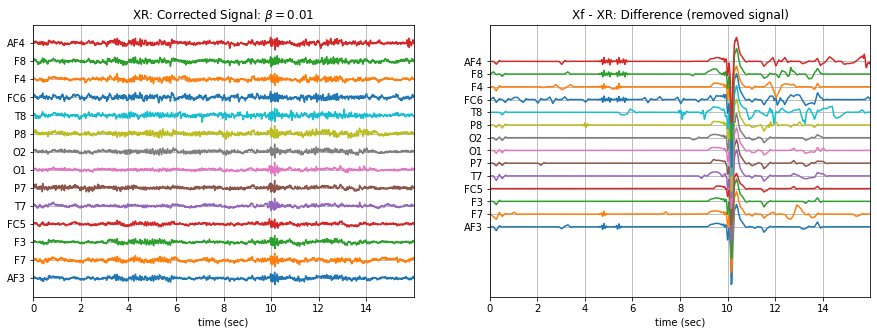

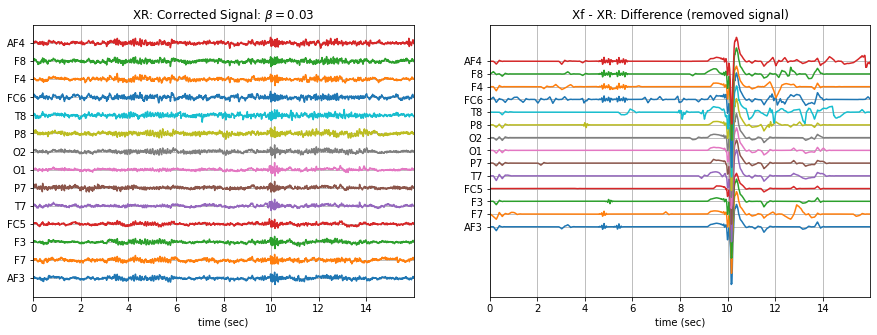

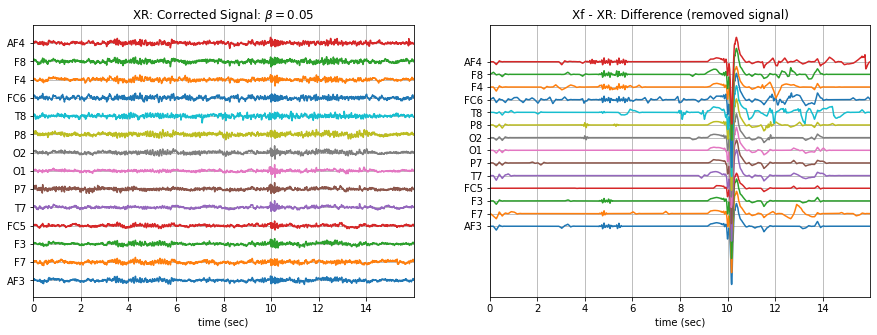

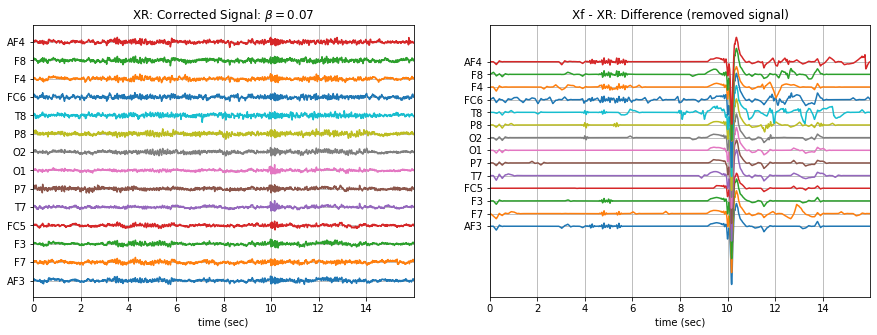

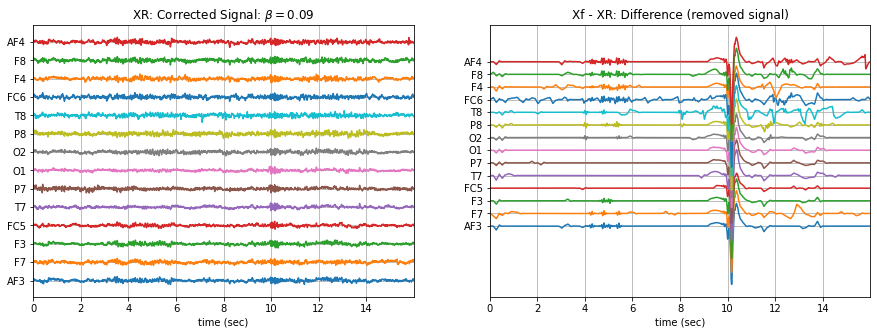

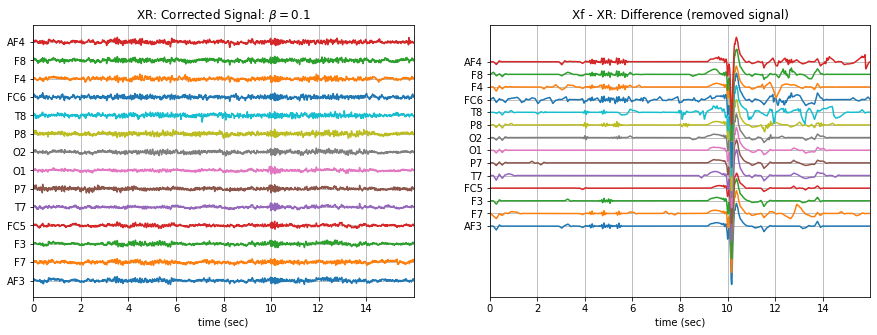

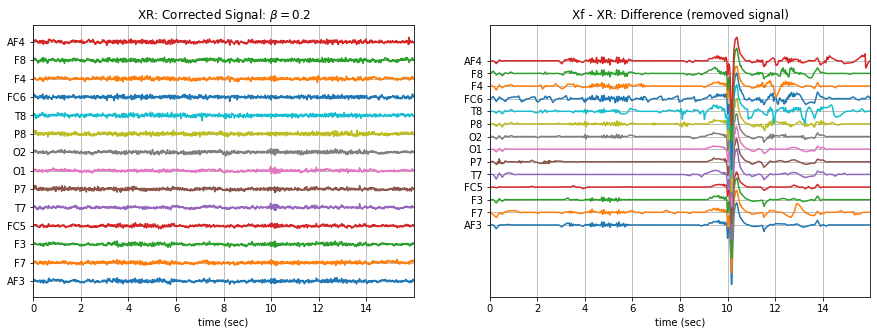

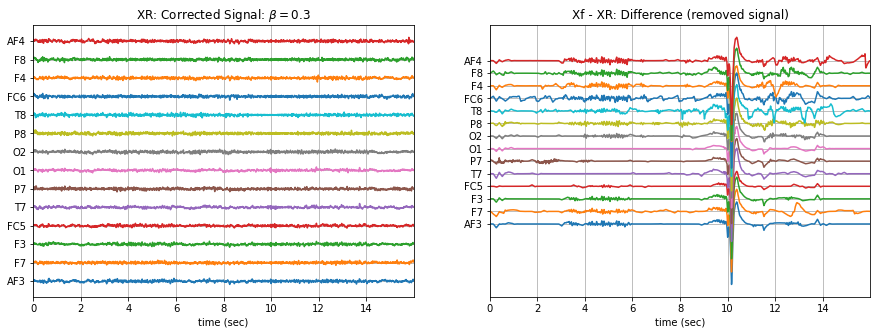

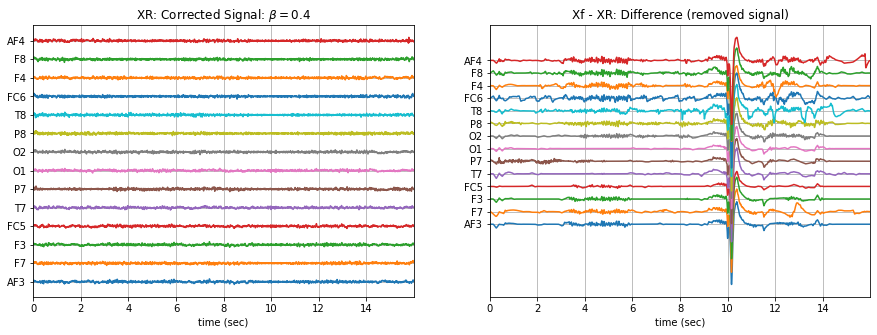

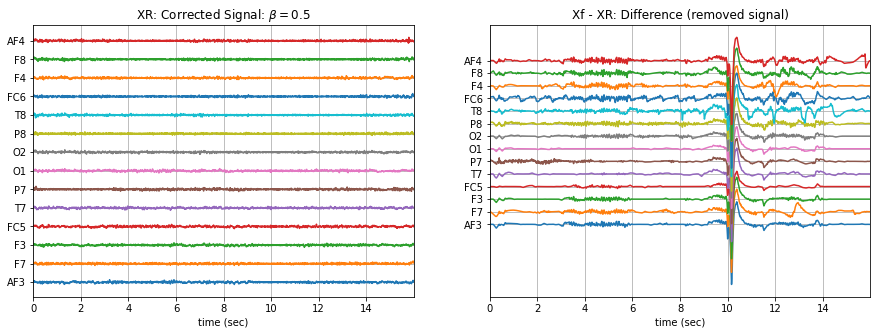

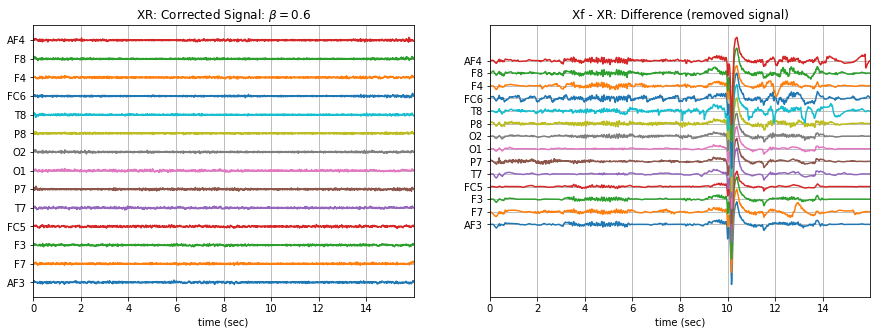

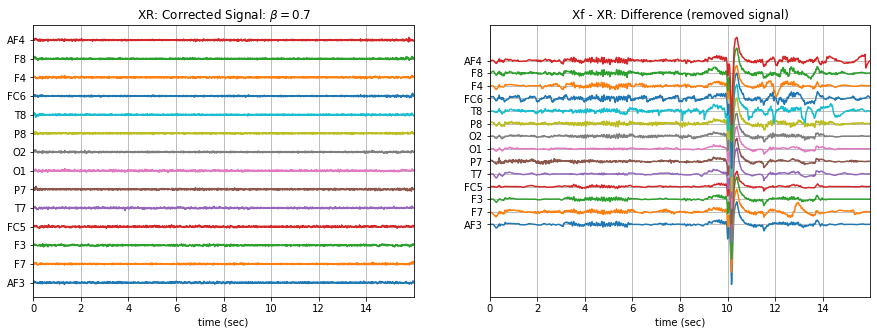

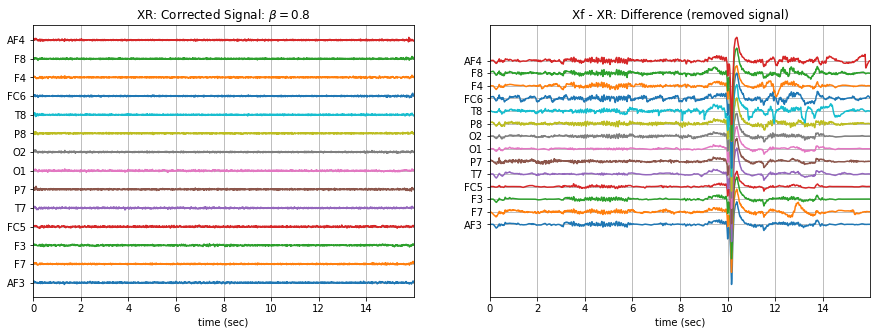

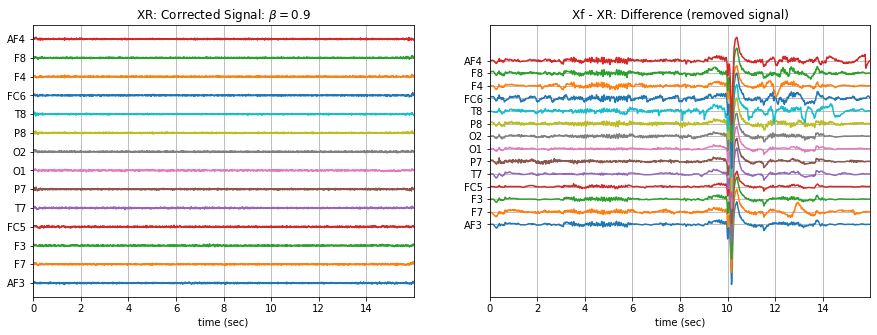

In [67]:
betas = np.r_[np.arange(0.01,0.1,0.02), np.arange(0.1,1, 0.1)].round(2)

for b in betas:
    XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),verbose=0,beta=b,OptMode='elim')
    XR.shape

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,XR+np.arange(-7,7)*200)
    plt.xlim([t[0],t[-1]])
    plt.xlabel('time (sec)')
    plt.yticks(np.arange(-7,7)*200,ch_names)
    plt.grid()
    plt.title('XR: Corrected Signal: '+r'$\beta=$' + f'{b}')
    
    plt.subplot(122)
    plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
    plt.xlim([t[0],t[-1]])
    plt.xlabel('time (sec)')
    plt.yticks(np.arange(-7,7)*200,ch_names)
    plt.grid()
    plt.title('Xf - XR: Difference (removed signal)')
    plt.show()

# Other settings
## Changing wavelet function

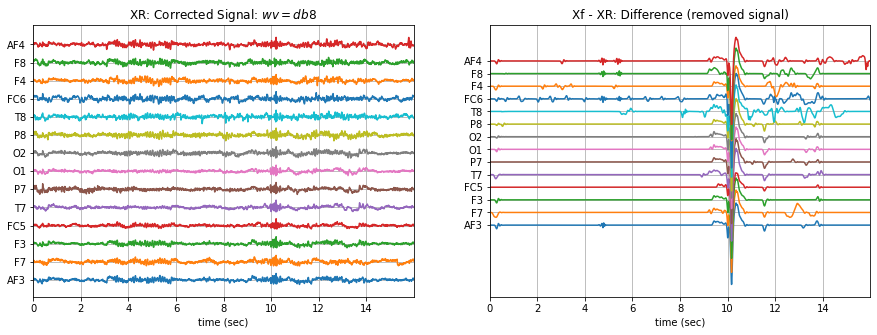

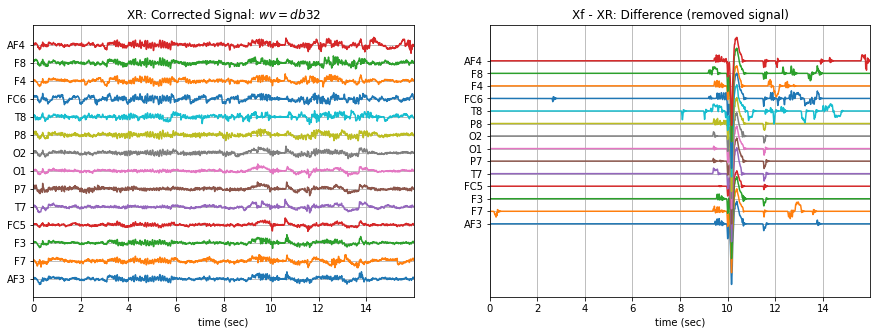

In [73]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),wv='db8',beta=0.01,OptMode='elim',verbose=0,)
XR.shape

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$wv=db8$')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()


XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),wv='db32',beta=0.01,OptMode='elim',verbose=0,)
XR.shape

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$wv=db32$')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Changing upper and lower bounds: $k_1$, $k_2$

$k_1$ and $k_2$ are lower and upper bound on the threshold $\theta_\alpha$. $k_1$ is set to 10, which means, the lowest threshold value will be 10, this helps to prevent the removal of entire signal (zeroing out) due to present of high magnitute of artifact. $k_2$ is largest threshold value, which in terms set the decaying curve of threshold $\theta_\alpha$. Increasing k2 will make the removal less aggressive

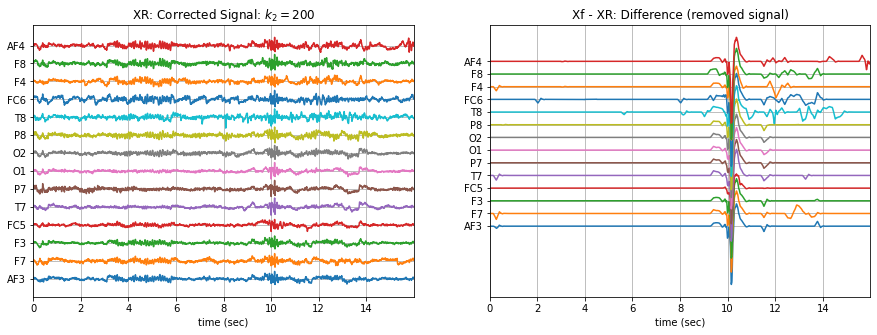

In [76]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),wv='db3',beta=0.1,OptMode='elim',verbose=0,k1=10, k2=200)
XR.shape

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$k_2=200$')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Changing IPR -  Interpercentile range

**IPR is interpercentile range**, which is set to 50% (IPR=[25,75]) as default (inter-quartile range), incresing the range increses the aggressiveness of removing artifacts. 

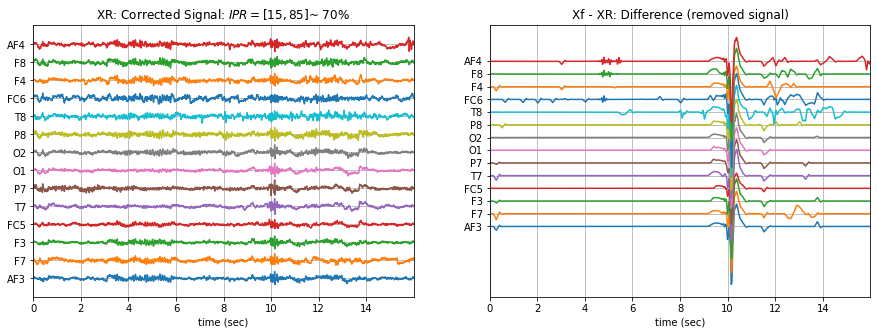

In [91]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),wv='db3',beta=0.1,OptMode='elim',verbose=0,k1=10, k2=200, IPR=[15,85])

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$IPR=[15,85]$~ 70%')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Using the fix threshold $\theta_\alpha=300$,  to all the windows

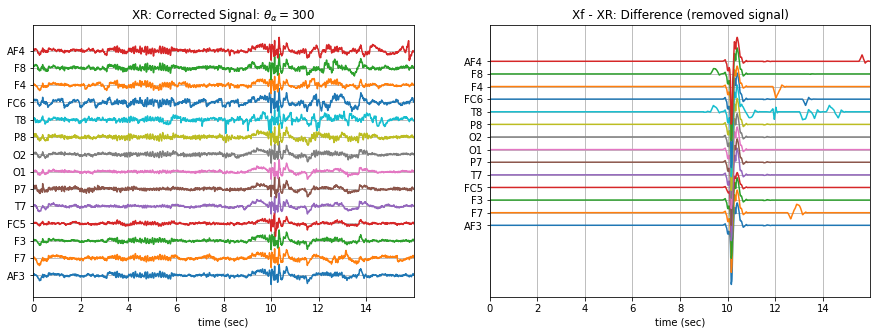

In [88]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),wv='db3',thr_method=None,theta_a=300,OptMode='elim',verbose=0)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$\theta_\alpha=300$')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

## Changing window length (5 sec)

**winsize** is be default set to 128 (1 sec), assuming 128 sampling rate, which can be changed as needed. In following example it is changed to 5 sec.

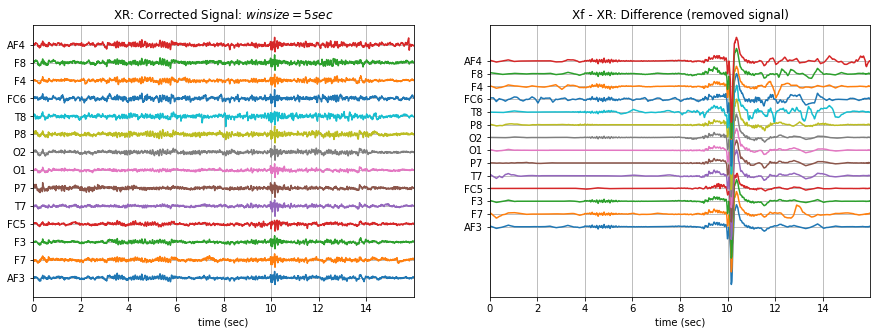

In [87]:
XR = sp.eeg.ATAR_mCh_noParallel(Xf.copy(),winsize=128*5,beta=0.01,OptMode='elim',verbose=0,)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal: '+r'$winsize=5sec$')

plt.subplot(122)
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

# Doc

In [27]:
help(sp.eeg.ATAR_mCh_noParallel)

Help on function ATAR_mCh_noParallel in module eeg.atar_algorithm:

ATAR_mCh_noParallel(X, wv='db3', winsize=128, thr_method='ipr', IPR=[25, 75], beta=0.1, k1=10, k2=100, est_wmax=100, theta_a=inf, bf=2, gf=0.8, OptMode='soft', wpd_mode='symmetric', wpd_maxlevel=None, factor=1.0, verbose=True, window=['hamming', True], hopesize=None, ReconMethod='custom', packetwise=False, WPD=True, lvl=[], fs=128.0)
    Apply ATAR on short windows of signal (multiple channels:): - Without using Joblib - in case that creates issue in some systems and IDE
    Signal is decomposed in smaller overlapping windows and reconstructed after correcting using overlap-add method.
    ------
    for more details, check:
    Bajaj, Nikesh, et al. "Automatic and tunable algorithm for EEG artifact removal using wavelet decomposition with applications in
    predictive modeling during auditory tasks." Biomedical Signal Processing and Control 55 (2020): 101624.
    ----------------
    
    input
    -----
    X: input

In [92]:
help(sp.eeg.ATAR_mCh)

Help on function ATAR_mCh in module eeg.atar_algorithm:

ATAR_mCh(X, wv='db3', winsize=128, thr_method='ipr', IPR=[25, 75], beta=0.1, k1=10, k2=100, est_wmax=100, theta_a=inf, bf=2, gf=0.8, OptMode='soft', wpd_mode='symmetric', wpd_maxlevel=None, factor=1.0, verbose=True, window=['hamming', True], hopesize=None, ReconMethod='custom', packetwise=False, WPD=True, lvl=[], fs=128.0)
    Apply ATAR on short windows of signal (multiple channels:):
    Signal is decomposed in smaller overlapping windows and reconstructed after correcting using overlap-add method.
    ------
    for more details, check:
    Bajaj, Nikesh, et al. "Automatic and tunable algorithm for EEG artifact removal using wavelet decomposition with applications in
    predictive modeling during auditory tasks." Biomedical Signal Processing and Control 55 (2020): 101624.
    ----------------
    
    input
    -----
    X: input multi-channel signal of shape (n,ch)
    
    Wavelet family:
    wv = ['db3'.....'db38', 'sym2..